## Steps:
- Importing necessary libraries
- Loading Dataset
- Understanding Problem Statement
- Data Understanding
- Missing Value Check
- EDA
- Preprocessing - Dummy Creation
- Train-Test Split
- Scaling
- Feature Selection - RFE
- Modelling
- Manual Feature Selection
- Evaluation

In [4]:
# For data analysis and numerical functions
import pandas as pd
import numpy as np

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## Load Data set

In [5]:
bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bike_df.shape

(730, 16)

In [7]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
bike_df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [10]:
# There are no missing values in given data set

In [11]:
bike_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

#### Dropping columns "instant, dteday, casual and registered" columns. These columns are not much significant to the target varaibel "cnt" 

In [12]:
bike_df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)

In [13]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Exploratory Data Analysis

In [14]:
# Mapping Categorical data to its actual values

# season (1:spring, 2:summer, 3:fall, 4:winter)
bike_df['season'] = bike_df['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# yr - 0:'2018', 1:'2019'
bike_df['yr'] = bike_df['yr'].replace({0:'2018', 1:'2019'})

# mnth - 1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
bike_df['mnth'] = bike_df['mnth'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 
                                           10:'Oct', 11:'Nov', 12:'Dec'})

# weekday - 0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'
bike_df['weekday'] = bike_df['weekday'].replace({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})

# weathersit - 1:'clear', 2:'mist', 3:'snow', 4:'rain'
bike_df['weathersit'] = bike_df['weathersit'].replace({1:'clear', 2:'mist', 3:'snow', 4:'rain'})

In [15]:
bike_df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801


In [16]:
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

#### Plot a Histplot for numerical cols

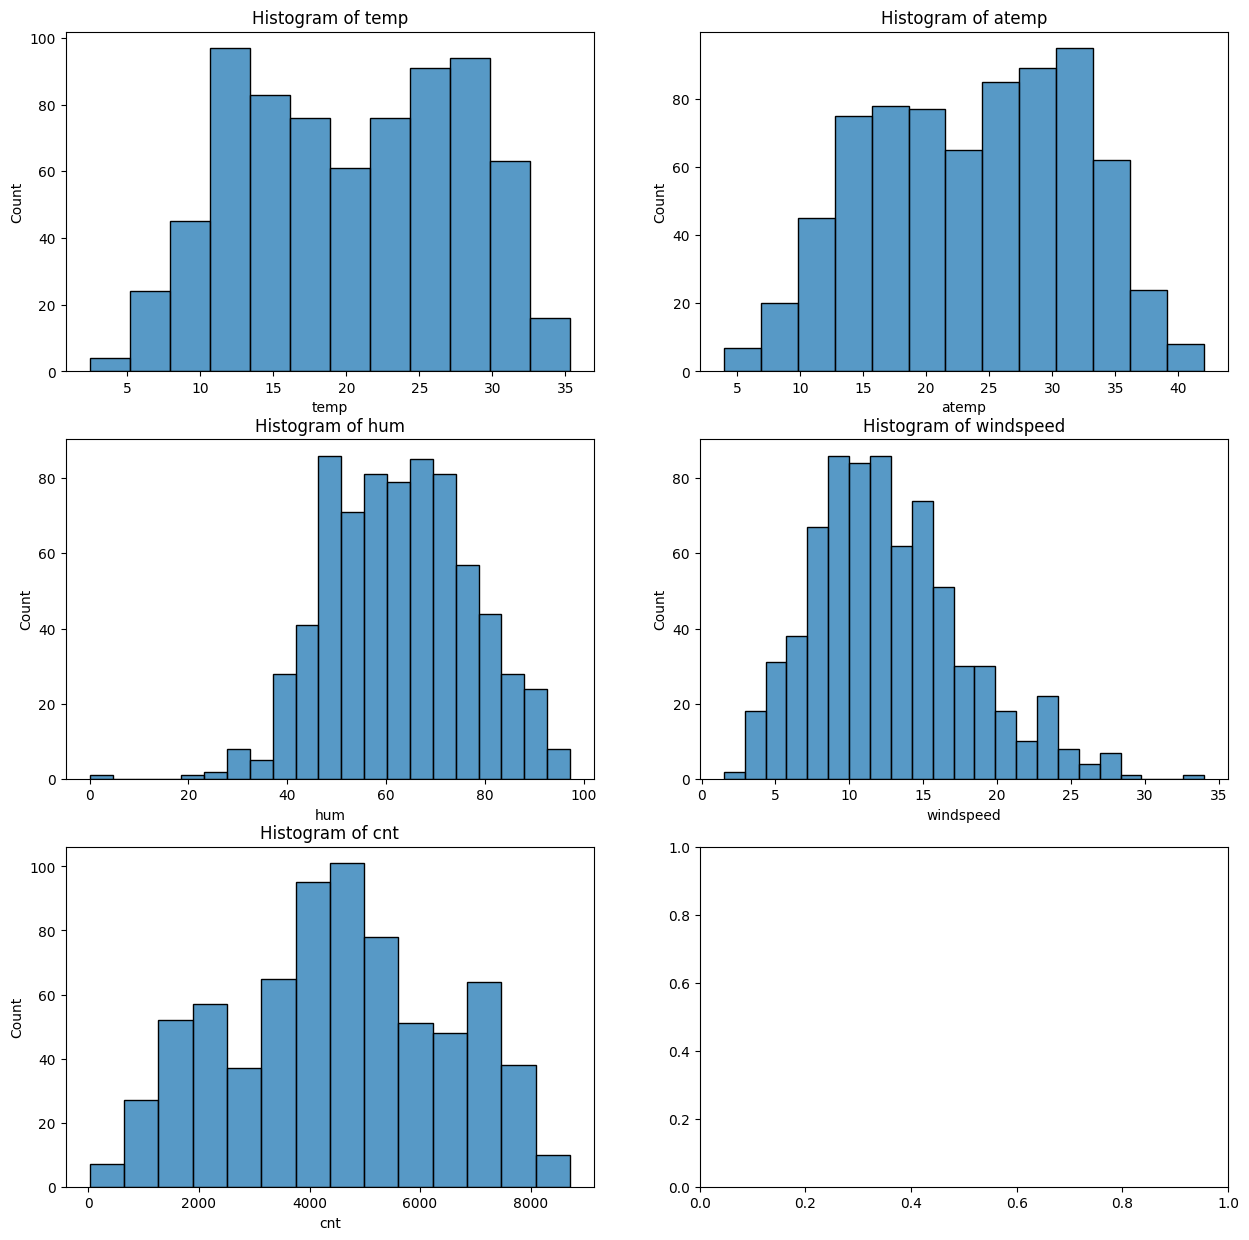

In [17]:
# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data = bike_df, x = col, ax = axes[i])
    axes[i].set_title(f'Histogram of {col}')
    
plt.show()

#### Count plot for Categorical cols

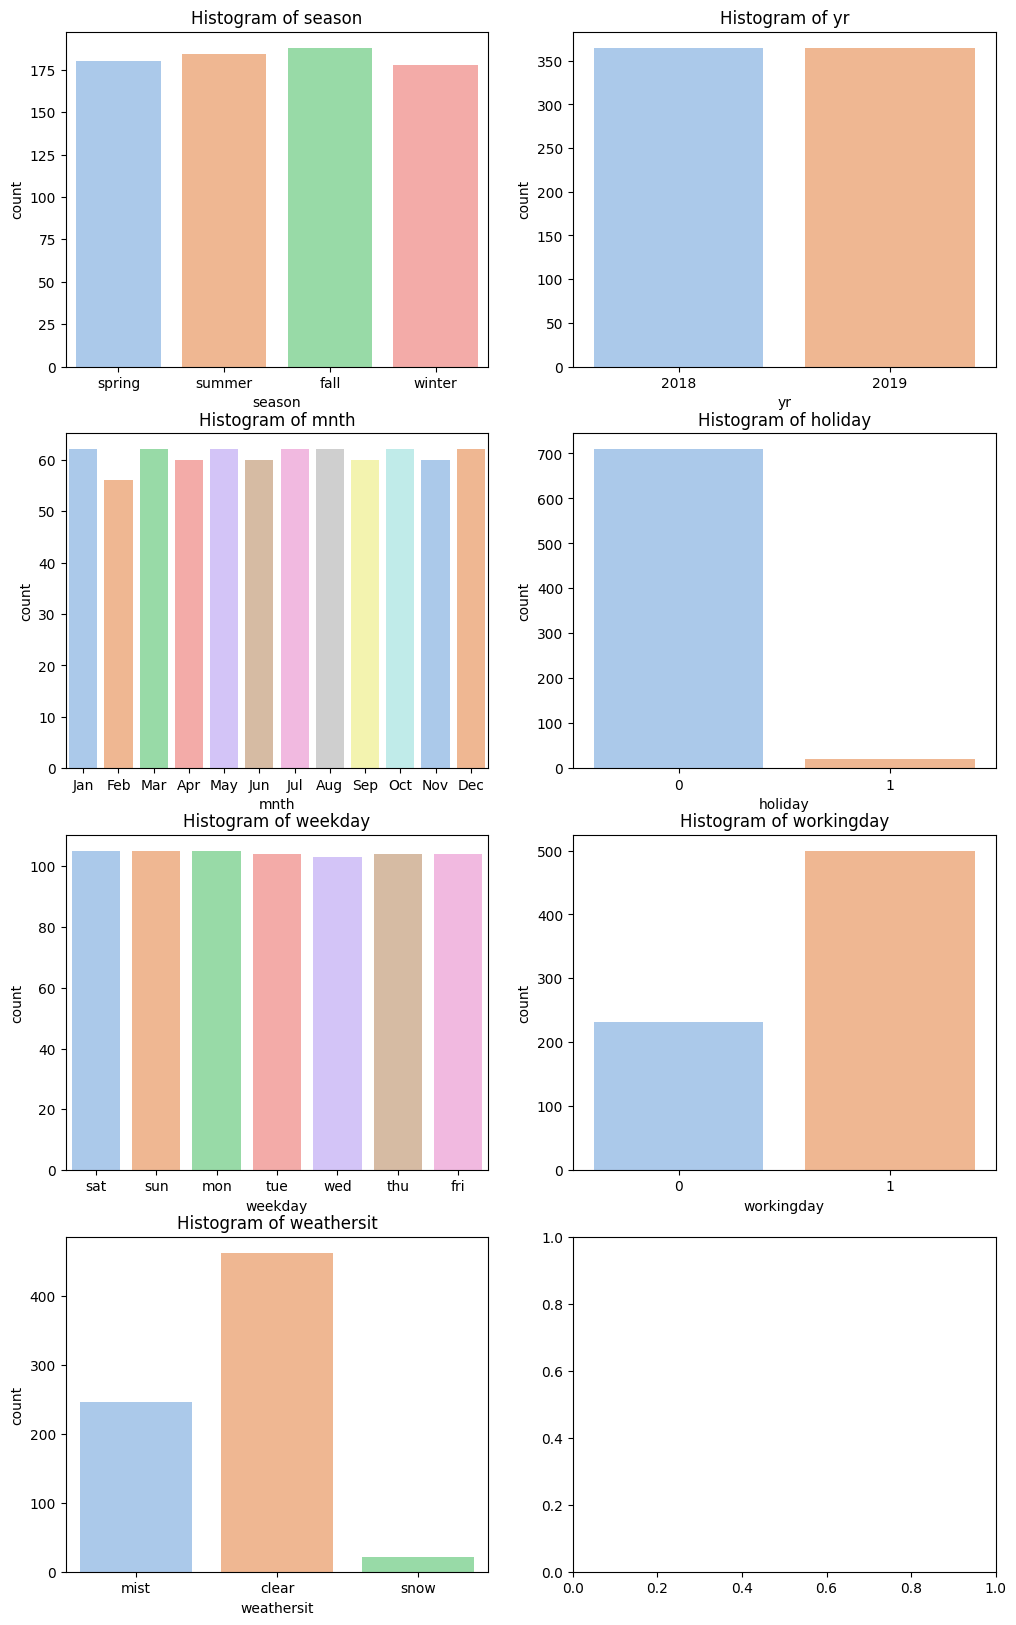

In [18]:
# Set up the subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data = bike_df, x = col, ax = axes[i], palette='pastel')
    axes[i].set_title(f'Histogram of {col}')
    
plt.show()

#### Bivariate Analysis

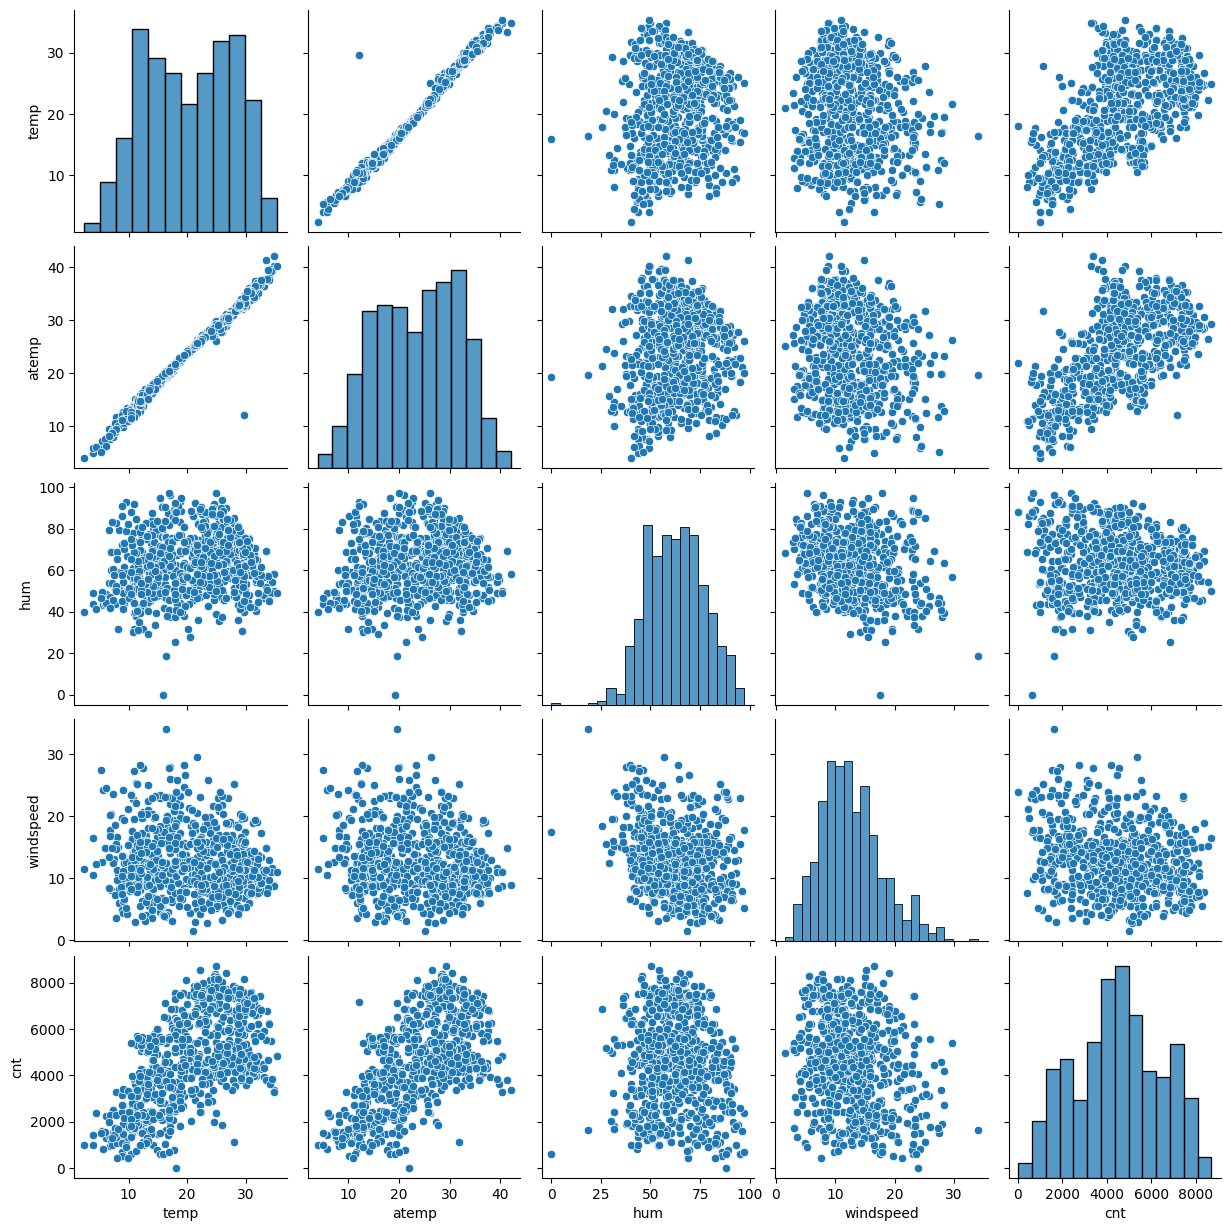

In [19]:
# Bivariate analysis

sns.pairplot(bike_df[num_cols])
plt.show()

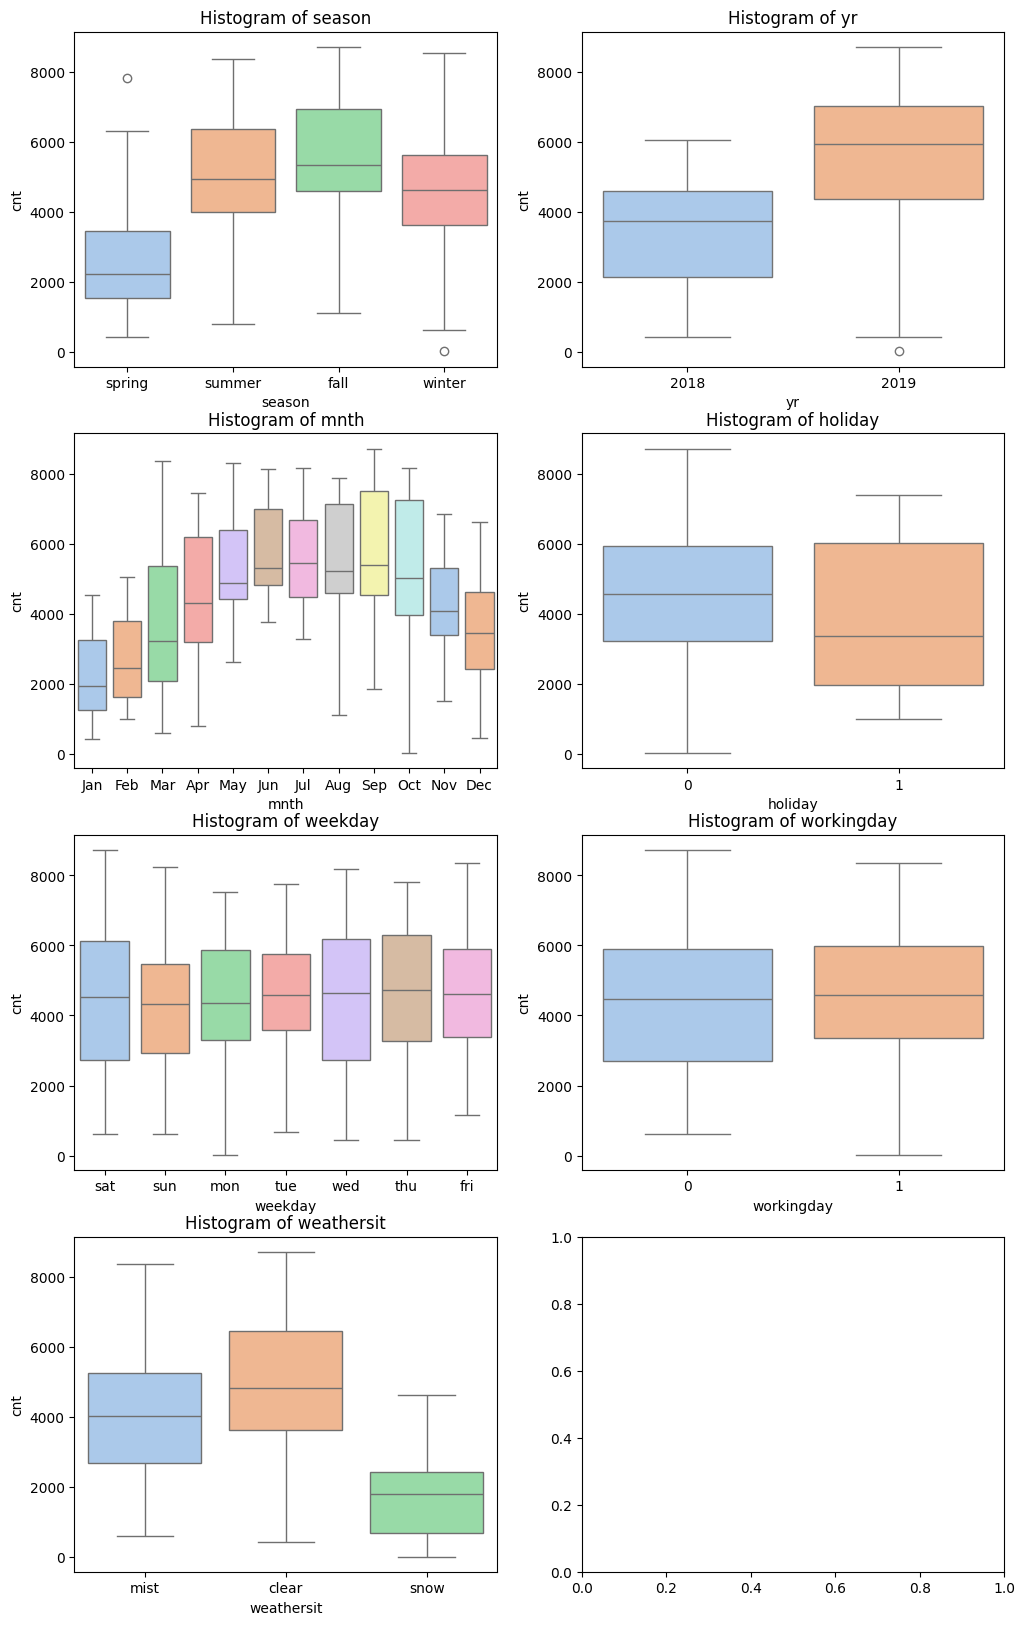

In [20]:
# Set up the subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.boxplot(data = bike_df, x = col, y = 'cnt' , ax = axes[i], palette='pastel')
    axes[i].set_title(f'Histogram of {col}')
    
plt.show()

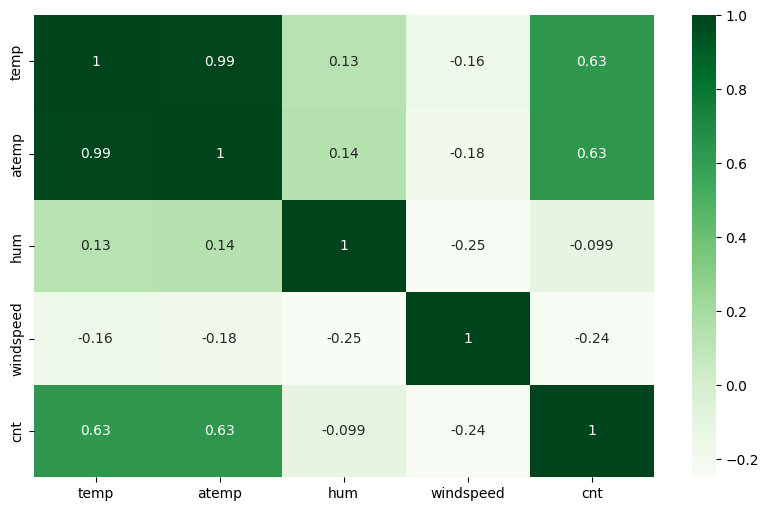

In [21]:
##### Multivariate Analysis

plt.figure(figsize=(10,6))
sns.heatmap(bike_df[num_cols].corr(),annot=True, cmap = 'Greens' )
plt.show()

#### Analysis from EDA:
* The **'temp'** and **'atemp'** variables shows strong correlation  with each.
* Both **'temp'** and **'atemp'** increase linearly with the **'cnt'** variable.
* The number of people using bikes is higher in 2019.
* There is a increase of bike usage in the months of May, June, July, August and Sep then there is a decrease of usage
* Bikes usage is higher during seasons like summer and fall.
* Bike usage is high when the weather is clear.

## Pre-processing Steps

#### Dummy Variables Creation

In [22]:
bike_df1 = pd.get_dummies(data = bike_df, columns=["season","yr","mnth","weekday","weathersit"], drop_first=True, dtype='int')
bike_df1.head(2)

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_mist,weathersit_snow
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [23]:
bike_df1.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_mist', 'weathersit_snow'],
      dtype='object')

In [24]:
bike_df1.shape

(730, 30)

### Train-Test Split

In [25]:
df_train, df_test = train_test_split(bike_df1, train_size = 0.70, random_state = 100)

In [26]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


#### Scaling

In [27]:
scaler=MinMaxScaler()
df_train[num_cols]=scaler.fit_transform(df_train[num_cols])
df_test[num_cols]=scaler.transform(df_test[num_cols])# As test data is unseen data we can't fit on it
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_mist,weathersit_snow
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,1,0
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,1,0


#### Dividing Training and Testing set into X and y

In [28]:
X_train = df_train.drop(['cnt'], axis = 1)
y_train = df_train['cnt']

In [29]:
X_test = df_test.drop(['cnt'], axis = 1)
y_test = df_test['cnt']

In [30]:
X_train.head(2)

,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_mist,weathersit_snow
576,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


### Feature Selection using RFE (Recursive Feature Elimination)
#### Running RFE with number of variables equal to 15

In [31]:
estimator = LinearRegression()

selector = RFE(estimator, n_features_to_select = 15)
selector.fit(X_train, y_train)
#Columns selected by RFE and their weights
list(zip(X_train.columns,selector.support_,selector.ranking_))

[('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.False_, np.int64(6)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_spring', np.True_, np.int64(1)),
 ('season_summer', np.True_, np.int64(1)),
 ('season_winter', np.True_, np.int64(1)),
 ('yr_2019', np.True_, np.int64(1)),
 ('mnth_Aug', np.False_, np.int64(8)),
 ('mnth_Dec', np.False_, np.int64(4)),
 ('mnth_Feb', np.False_, np.int64(5)),
 ('mnth_Jan', np.False_, np.int64(2)),
 ('mnth_Jul', np.True_, np.int64(1)),
 ('mnth_Jun', np.False_, np.int64(14)),
 ('mnth_Mar', np.False_, np.int64(15)),
 ('mnth_May', np.False_, np.int64(7)),
 ('mnth_Nov', np.False_, np.int64(3)),
 ('mnth_Oct', np.False_, np.int64(13)),
 ('mnth_Sep', np.True_, np.int64(1)),
 ('weekday_mon', np.False_, np.int64(9)),
 ('weekday_sat', np.True_, np.int64(1)),
 ('weekday_sun', np.True_, np.int64(1)),
 ('weekday_thu', np.False_, np.int64(11)),
 ('weekday_tue', n

In [32]:
selected_features = X_train.columns[selector.support_]
selected_features

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'yr_2019', 'mnth_Jul', 'mnth_Sep',
       'weekday_sat', 'weekday_sun', 'weathersit_mist', 'weathersit_snow'],
      dtype='object')

In [33]:
X_train = X_train[selected_features]
X_test = X_test[selected_features] # Adding the selected features to the test set as well

In [34]:
X_train.head()

,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Jul,mnth_Sep,weekday_sat,weekday_sun,weathersit_mist,weathersit_snow
576,0,1,0.815169,0.725633,0.264686,0,0,0,1,1,0,0,0,0,0
426,0,0,0.442393,0.640189,0.255342,1,0,0,1,0,0,1,0,1,0
728,0,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,1,0,0
482,0,0,0.395666,0.504508,0.188475,0,1,0,1,0,0,1,0,1,0
111,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1,0


#### Modeling

In [35]:
X_train_sm1 = sm.add_constant(X_train)

In [36]:
X_train_sm1.head(2)

,const,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Jul,mnth_Sep,weekday_sat,weekday_sun,weathersit_mist,weathersit_snow
576,1.0,0,1,0.815169,0.725633,0.264686,0,0,0,1,1,0,0,0,0,0
426,1.0,0,0,0.442393,0.640189,0.255342,1,0,0,1,0,0,1,0,1,0


In [38]:
model1 = sm.OLS(y_train, X_train_sm1)
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          2.11e-191
Time:                        15:03:55   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1995      0.028      7.200      0.000       0.145       0.254
holiday            -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday          0.0837      0.010      8.665      0.000       0.065       0.103
temp                0.5277      0.033     15.884      0.000       0.462       0.593
hum                -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed          -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_spring      -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer       0.0537      0.015      3.631      0.000       0.025       0.083
season_winter       0.0992      0.017      5.815      0.000       0.066       0.133
yr_2019             0.2298      0.008     28.647      0.000       0.214       0.246
mnth_Jul           -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_Sep            0.0820      0.017      4.966      0.000       0.050       0.114
weekday_sat         0.0937      0.012      8.040      0.000       0.071       0.117
weekday_sun         0.0406      0.012      3.315      0.001       0.017       0.065
weathersit_mist    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
weathersit_snow    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     1.41e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.63e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* **holiday** is  insignificant in the presence of other variables hence dropping it.

In [39]:
X_train_sm1.drop('holiday', axis =1, inplace = True)

#### Model2

In [40]:
X_train_sm2 = sm.add_constant(X_train_sm1)

In [41]:
model2 = sm.OLS(y_train, X_train_sm2)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          2.11e-191
Time:                        15:03:55   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1811      0.042      4.301      0.000       0.098       0.264
workingday          0.1021      0.025      4.024      0.000       0.052       0.152
temp                0.5277      0.033     15.884      0.000       0.462       0.593
hum                -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed          -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_spring      -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer       0.0537      0.015      3.631      0.000       0.025       0.083
season_winter       0.0992      0.017      5.815      0.000       0.066       0.133
yr_2019             0.2298      0.008     28.647      0.000       0.214       0.246
mnth_Jul           -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_Sep            0.0820      0.017      4.966      0.000       0.050       0.114
weekday_sat         0.1121      0.027      4.181      0.000       0.059       0.165
weekday_sun         0.0591      0.027      2.192      0.029       0.006       0.112
weathersit_mist    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
weathersit_snow    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#####  All p-values looks good, so going for VIF

In [42]:
X_train_sm2.drop(['const'], axis =1, inplace = True)

In [43]:
# Acceptable Range for p-values is <0.05
# Acceptable Range for VIF is <=5

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm2.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm2.values,i) 
                 for i in range(len(X_train_sm2.columns))]

vif_data['VIF'] = round(vif_data['VIF'], 3)
vif_data = vif_data.sort_values(by='VIF',ascending=False)
vif_data

,Feature,VIF
2,hum,32.105
1,temp,18.989
0,workingday,18.410
10,weekday_sat,4.908
3,windspeed,4.905
4,season_spring,4.800
11,weekday_sun,4.762
6,season_winter,3.692
5,season_summer,3.040
12,weathersit_mist,2.310


* Dropping **'hum'** variable as it has high VIF value

In [44]:
X_train_sm2.drop(['hum'], axis =1, inplace = True)

#### Model3

In [45]:
X_train_sm3 = sm.add_constant(X_train_sm2)

In [46]:
model3 = sm.OLS(y_train, X_train_sm3)
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.28e-188
Time:                        15:03:55   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1008      0.038      2.624      0.009       0.025       0.176
workingday          0.1029      0.026      3.983      0.000       0.052       0.154
temp                0.4915      0.033     15.027      0.000       0.427       0.556
windspeed          -0.1491      0.025     -6.024      0.000      -0.198      -0.100
season_spring      -0.0655      0.021     -3.147      0.002      -0.106      -0.025
season_summer       0.0477      0.015      3.180      0.002       0.018       0.077
season_winter       0.0846      0.017      4.971      0.000       0.051       0.118
yr_2019             0.2337      0.008     28.828      0.000       0.218       0.250
mnth_Jul           -0.0496      0.018     -2.702      0.007      -0.086      -0.014
mnth_Sep            0.0759      0.017      4.537      0.000       0.043       0.109
weekday_sat         0.1146      0.027      4.201      0.000       0.061       0.168
weekday_sun         0.0567      0.027      2.069      0.039       0.003       0.111
weathersit_mist    -0.0822      0.009     -9.514      0.000      -0.099      -0.065
weathersit_snow    -0.2895      0.024    -11.880      0.000      -0.337      -0.242
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
X_train_sm3.drop(['const'], axis = 1, inplace = True)

In [48]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm3.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm3.values,i) 
                 for i in range(len(X_train_sm3.columns))]

vif_data['VIF'] = round(vif_data['VIF'], 3)
vif_data = vif_data.sort_values(by='VIF',ascending=False)
vif_data

,Feature,VIF
0,workingday,16.192
1,temp,12.735
2,windspeed,4.757
9,weekday_sat,4.451
10,weekday_sun,4.210
3,season_spring,3.821
5,season_winter,2.782
4,season_summer,2.764
6,yr_2019,2.073
7,mnth_Jul,1.597


* Dropping **'workingday'** as it has high VIF value

In [49]:
X_train_sm3.drop('workingday', axis = 1, inplace = True)

#### Model4

In [50]:
X_train_sm4 = sm.add_constant(X_train_sm3)

In [51]:
model4 = sm.OLS(y_train, X_train_sm4)
res4 = model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          2.06e-186
Time:                        15:03:55   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2003      0.030      6.760      0.000       0.142       0.259
temp                0.4928      0.033     14.847      0.000       0.428       0.558
windspeed          -0.1513      0.025     -6.025      0.000      -0.201      -0.102
season_spring      -0.0681      0.021     -3.225      0.001      -0.110      -0.027
season_summer       0.0481      0.015      3.159      0.002       0.018       0.078
season_winter       0.0816      0.017      4.731      0.000       0.048       0.116
yr_2019             0.2342      0.008     28.467      0.000       0.218       0.250
mnth_Jul           -0.0488      0.019     -2.618      0.009      -0.085      -0.012
mnth_Sep            0.0723      0.017      4.264      0.000       0.039       0.106
weekday_sat         0.0157      0.011      1.370      0.171      -0.007       0.038
weekday_sun        -0.0421      0.012     -3.548      0.000      -0.065      -0.019
weathersit_mist    -0.0802      0.009     -9.170      0.000      -0.097      -0.063
weathersit_snow    -0.2848      0.025    -11.530      0.000      -0.333      -0.236
==============================================================================
Omnibus:                       80.355   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.836
Skew:                          -0.790   Prob(JB):                     7.39e-46
Kurtosis:                       5.699   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Dropping **'weekday_sat'** as it has high p-value

In [52]:
X_train_sm4.drop('weekday_sat', axis = 1, inplace = True)

#### Model5

In [53]:
X_train_sm5 = sm.add_constant(X_train_sm4)
X_train_sm5.head(2)

,const,temp,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Jul,mnth_Sep,weekday_sun,weathersit_mist,weathersit_snow
576,1.0,0.815169,0.264686,0,0,0,1,1,0,0,0,0
426,1.0,0.442393,0.255342,1,0,0,1,0,0,0,1,0


In [54]:
model5 = sm.OLS(y_train, X_train_sm5)
res5 = model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          3.37e-187
Time:                        15:03:55   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2034      0.030      6.877      0.000       0.145       0.261
temp                0.4917      0.033     14.805      0.000       0.426       0.557
windspeed          -0.1497      0.025     -5.963      0.000      -0.199      -0.100
season_spring      -0.0682      0.021     -3.227      0.001      -0.110      -0.027
season_summer       0.0479      0.015      3.145      0.002       0.018       0.078
season_winter       0.0818      0.017      4.739      0.000       0.048       0.116
yr_2019             0.2339      0.008     28.414      0.000       0.218       0.250
mnth_Jul           -0.0483      0.019     -2.587      0.010      -0.085      -0.012
mnth_Sep            0.0723      0.017      4.260      0.000       0.039       0.106
weekday_sun        -0.0450      0.012     -3.847      0.000      -0.068      -0.022
weathersit_mist    -0.0802      0.009     -9.161      0.000      -0.097      -0.063
weathersit_snow    -0.2847      0.025    -11.513      0.000      -0.333      -0.236
==============================================================================
Omnibus:                       75.768   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.623
Skew:                          -0.732   Prob(JB):                     3.69e-45
Kurtosis:                       5.736   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
X_train_sm5.drop('const', axis = 1, inplace = True)

In [56]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm5.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm5.values,i) 
                 for i in range(len(X_train_sm5.columns))]

vif_data['VIF'] = round(vif_data['VIF'], 3)
vif_data = vif_data.sort_values(by='VIF',ascending=False)
vif_data

,Feature,VIF
0,temp,5.135
1,windspeed,4.599
3,season_summer,2.235
2,season_spring,2.089
5,yr_2019,2.067
4,season_winter,1.796
6,mnth_Jul,1.587
9,weathersit_mist,1.551
7,mnth_Sep,1.332
8,weekday_sun,1.175


In [57]:
X_train_sm5 = sm.add_constant(X_train_sm5)

In [58]:
print(round(res5.params, 4))

const              0.2034
temp               0.4917
windspeed         -0.1497
season_spring     -0.0682
season_summer      0.0479
season_winter      0.0818
yr_2019            0.2339
mnth_Jul          -0.0483
mnth_Sep           0.0723
weekday_sun       -0.0450
weathersit_mist   -0.0802
weathersit_snow   -0.2847
dtype: float64


In [59]:
y_train_pred=res5.predict(X_train_sm5)

In [60]:
# R2_score on final model 
r2_train = r2_score(y_train, y_train_pred)
print(round(r2_train,3))

0.836


### Final Model:

* cnt = 0.2034 + (0.4917\*temp) - (0.1497\*windspeed) - (0.0682\*season_spring) + (0.0479\*season_summer)+ (0.0818\*season_winter) + (0.2339\*yr_2019) - (0.0483\*mnth_Jul) + (0.0723\*mnth_Sep) - (0.0450\*weekday_sun) - (0.0802\*weathersit_mist) - (0.2847\*weathersit_snow)

## Residual Analysis

#### Checking Error terms are normally distributed or not

In [61]:
res_train = (y_train - y_train_pred)

res_train

576    0.077417
426   -0.002894
728   -0.141274
482   -0.088291
111   -0.092966
         ...   
578   -0.001266
53    -0.000136
350    0.050188
79    -0.082802
520    0.156685
Length: 510, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

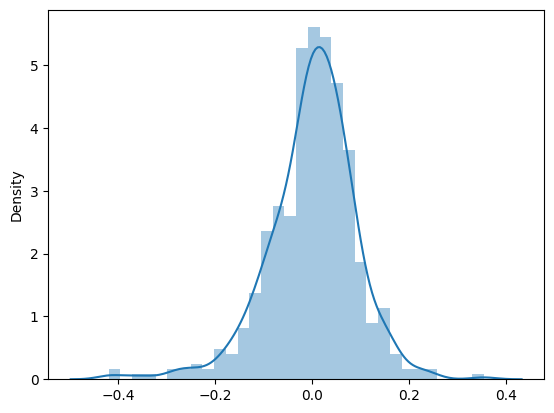

In [62]:
sns.distplot(res_train)
plt.show

#### Looking for the patterns in the residuals. No pattern should be found

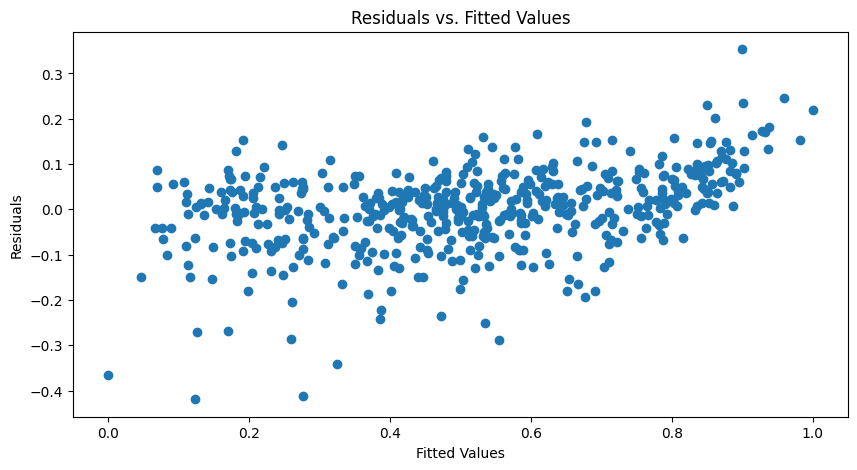

In [63]:
plt.figure(figsize=(10, 5))
plt.scatter(y_train, res_train)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

### Making Predictions on test data

In [64]:
X_test.head()

,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Jul,mnth_Sep,weekday_sat,weekday_sun,weathersit_mist,weathersit_snow
184,1,0,0.831783,0.657364,0.084219,0,0,0,0,1,0,0,0,1,0
535,0,1,0.901354,0.610133,0.153728,0,1,0,1,0,0,0,0,0,0
299,0,1,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,1,0
221,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0,0,0,0,0
152,0,1,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,0,0


In [65]:
X_train_new = X_train_sm5.drop('const', axis = 1) 
X_test_sm = X_test[X_train_new.columns]
X_test_sm.head(2)

,temp,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Jul,mnth_Sep,weekday_sun,weathersit_mist,weathersit_snow
184,0.831783,0.084219,0,0,0,0,1,0,0,1,0
535,0.901354,0.153728,0,1,0,1,0,0,0,0,0


In [66]:
X_test_sm = sm.add_constant(X_test_sm)

In [67]:
y_test_pred = res5.predict(X_test_sm)
y_test_pred

184    0.471313
535    0.905370
299    0.406705
221    0.586087
152    0.572698
         ...   
702    0.731998
127    0.483404
640    0.797697
72     0.267780
653    0.724798
Length: 220, dtype: float64

#### Plotting a graph for Actual test and predicted values

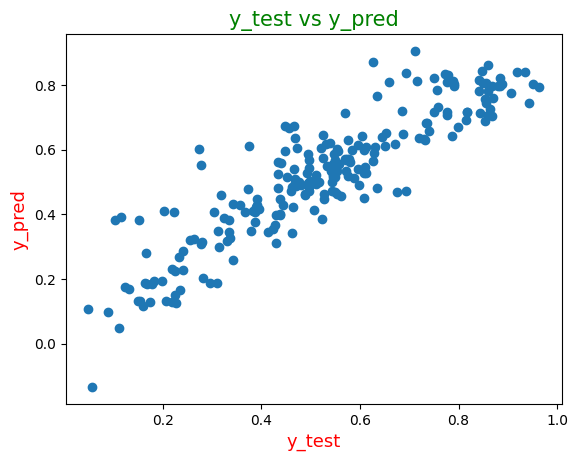

In [68]:
plt.scatter(y_test, y_test_pred)
plt.title("y_test vs y_pred", fontdict={'color':'Green', 'fontsize':15})
plt.xlabel("y_test", fontdict={'color':'Red', 'fontsize':13})
plt.ylabel("y_pred", fontdict={'color':'Red', 'fontsize':13})
plt.show()

#### Calculating R2_score on test set

In [69]:
r2_test = r2_score(y_test, y_test_pred)
print('r2_train', round(r2_train,3), 'r2_test', round(r2_test,3))

r2_train 0.836 r2_test 0.806


In [70]:
# Calculating MSE 
print("MSE_Train:", round(mean_squared_error(y_train, y_train_pred),3),"MSE_Test:", round(mean_squared_error(y_test, y_test_pred),3))

MSE_Train: 0.008 MSE_Test: 0.009


In [71]:
res5.params

const              0.203387
temp               0.491742
windspeed         -0.149694
season_spring     -0.068197
season_summer      0.047885
season_winter      0.081830
yr_2019            0.233876
mnth_Jul          -0.048253
mnth_Sep           0.072321
weekday_sun       -0.044959
weathersit_mist   -0.080237
weathersit_snow   -0.284654
dtype: float64

#### Our final model has the following predictor variables that influence the bike booking:

+ temp
+ windspeed
+ season_spring
+ season_summer
+ season_winter
+ yr_2019
+ mnth_Jul
+ mnth_Sep
+ weekday_sun
+ weathersit_mist
+ weathersit_snow